In [2]:
import cv2
import matplotlib.pyplot as plt
input_shape = (224, 224, 3)
image_size = (224,224)

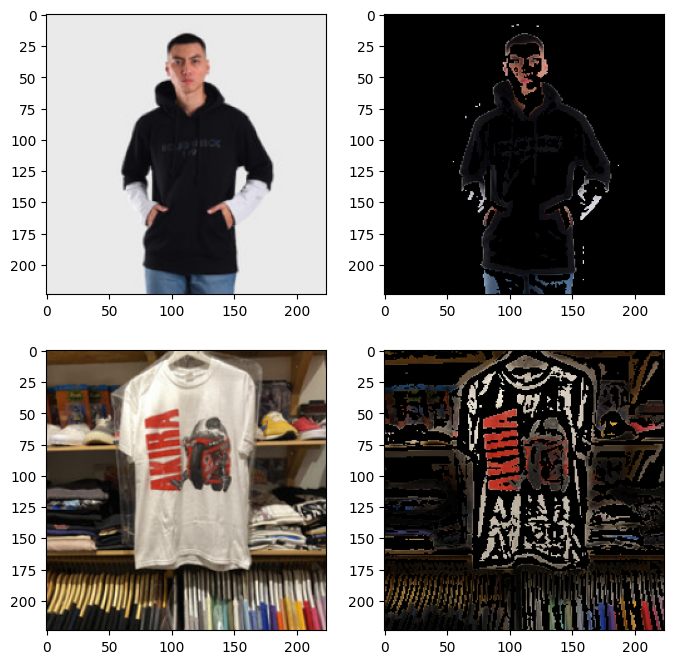

In [3]:
img = cv2.imread("./train/6.jpg")
img = cv2.resize(img, image_size,interpolation = cv2.INTER_LINEAR)

img2 = cv2.imread("./train/5.jpg")
img2 = cv2.resize(img2, image_size,interpolation = cv2.INTER_LINEAR)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

fg_mask = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 3)
fg_mask2 = cv2.adaptiveThreshold(img_gray2, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 3)

foreground = cv2.bitwise_and(img, img, mask=fg_mask)
foreground2 = cv2.bitwise_and(img2, img2, mask=fg_mask2)


plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB))
plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(foreground2, cv2.COLOR_BGR2RGB))

plt.show()

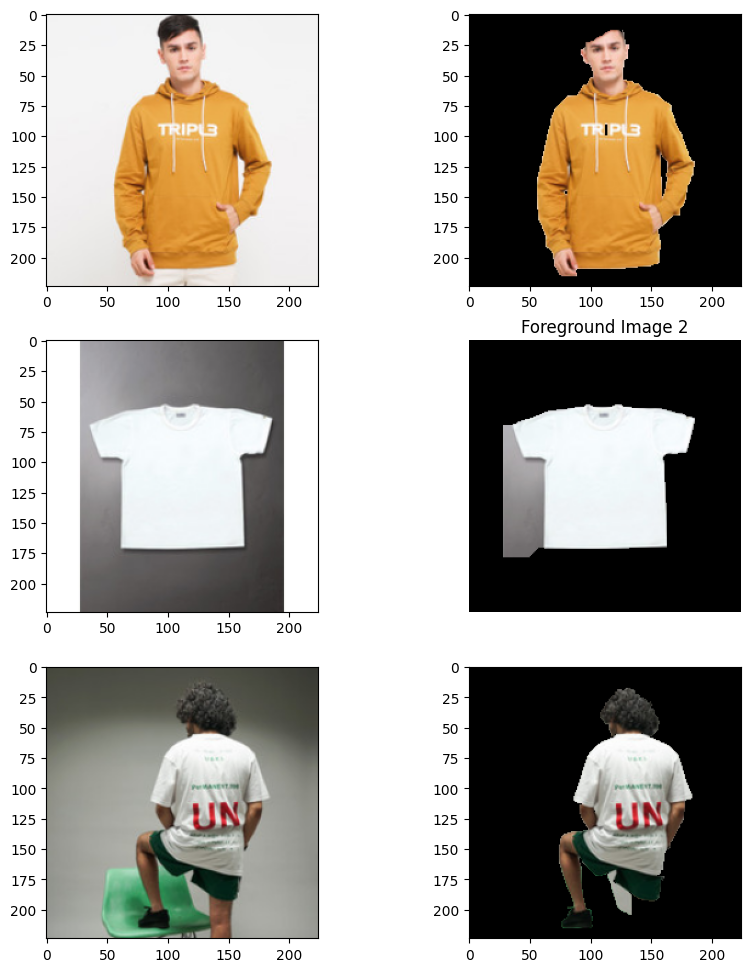

In [47]:
import numpy as np
img1 = cv2.imread("./train/1.jpg")
img1 = cv2.resize(img1, image_size,interpolation = cv2.INTER_LINEAR)
img2 = cv2.imread("./train/7.jpg")
img2 = cv2.resize(img2, image_size,interpolation = cv2.INTER_LINEAR)
img3 = cv2.imread("./train/741.jpg")
img3 = cv2.resize(img3, image_size,interpolation = cv2.INTER_LINEAR)

def grabCut (img):
    mask = np.zeros(img.shape[:2], np.uint8)

    rect = (8, 8, 224 -16, 224 -16)
    bgd_model = np.zeros((1, 65), np.float64)
    fgd_model = np.zeros((1, 65), np.float64) 
    cv2.grabCut(img, mask, rect, bgd_model, fgd_model, 8, cv2.GC_INIT_WITH_RECT)

    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
    foreground = img * mask2[:, :, np.newaxis]

    return foreground

f1 = grabCut(img1)
f2 = grabCut(img2)
f3 = grabCut(img3)

plt.figure(figsize=(10, 12))

plt.subplot(3, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.subplot(3, 2, 2)
plt.imshow(cv2.cvtColor(f1, cv2.COLOR_BGR2RGB))
plt.subplot(3, 2, 3)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.subplot(3, 2, 4)
plt.imshow(cv2.cvtColor(f2, cv2.COLOR_BGR2RGB))
plt.title('Foreground Image 2')
plt.axis('off')
plt.subplot(3, 2, 5)
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.subplot(3, 2, 6)
plt.imshow(cv2.cvtColor(f3, cv2.COLOR_BGR2RGB))
plt.show()